# <center> **Previsão de pouso do primeiro estágio do Falcon 9 da SpaceX** </center>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Analise Exploratória dos Dados

O objetivo principal nesta etapa do projeto, é realizar uma analise explratoria dos dados, com foco na visualização e também na aplicação de tecnicas de feature engineering, para que deste modo, possa visualizar as relações entre as variaveis e em enrobustecer o conjundo de dados, trazendo mais eficiencia no processamento dos dados.

In [22]:
#df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [23]:
# Checagem Inicial do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

Explorando o dataset, pode se concluir que, temos um total de 90 registros nesta amostra, e 18 variaveis, sendo que, destas 18, a variavel ``Class`` será a variavel dependente, nosso Y.

Também é notorio que, será necessário um tratamento no tipo dos dados inseridos em algumas das colunas, pois, algumas delas se encontram com o tipo de dados não condizente a sua originalidade, a qual lhe é de sua natureza, por esse motivo, se torna essencial a conversão para o tipo corredo de dado em cada variavel. Outra observação que deve ser feita, é que, aparentemente a variavel ``LandingPad`` pode possuir valores ausentes, porém, uma checagem mais aprofundada se faz necessário antes do processamento destes dados.

### Visualizando a Relação entre as Variaveis ``PayloadMass``, ``FlightNumber`` em comparação a Variavel ``Class``

Como primeiro passo, visualizaremos a relação entre as variaveis ``FlightNumber``, a qual, indica os numeros referente aos continuos lançamentos do falcon 9, versus a variavel ``PayloadMass``, que informa a massa de carga útil que o foguete falcon 9 carrega consigo, e com isso, observar como estas variaveis se relacionam com o resultado final, o pouso do primeiro estagio do foguete falcon 9. 

Plotando um grafico de dispersão, com a variavel ``FlightNumber`` no eixo x vs. ``PayloadMass`` no eixo y, se visualiza a relação entre estas variaveis em comparação com a varaievl ``Class``, a qual mostram as classes que estão relacionadas as categorias, sucesso ou fracasso, do pouso do primeiro estagio do Falcon 9.

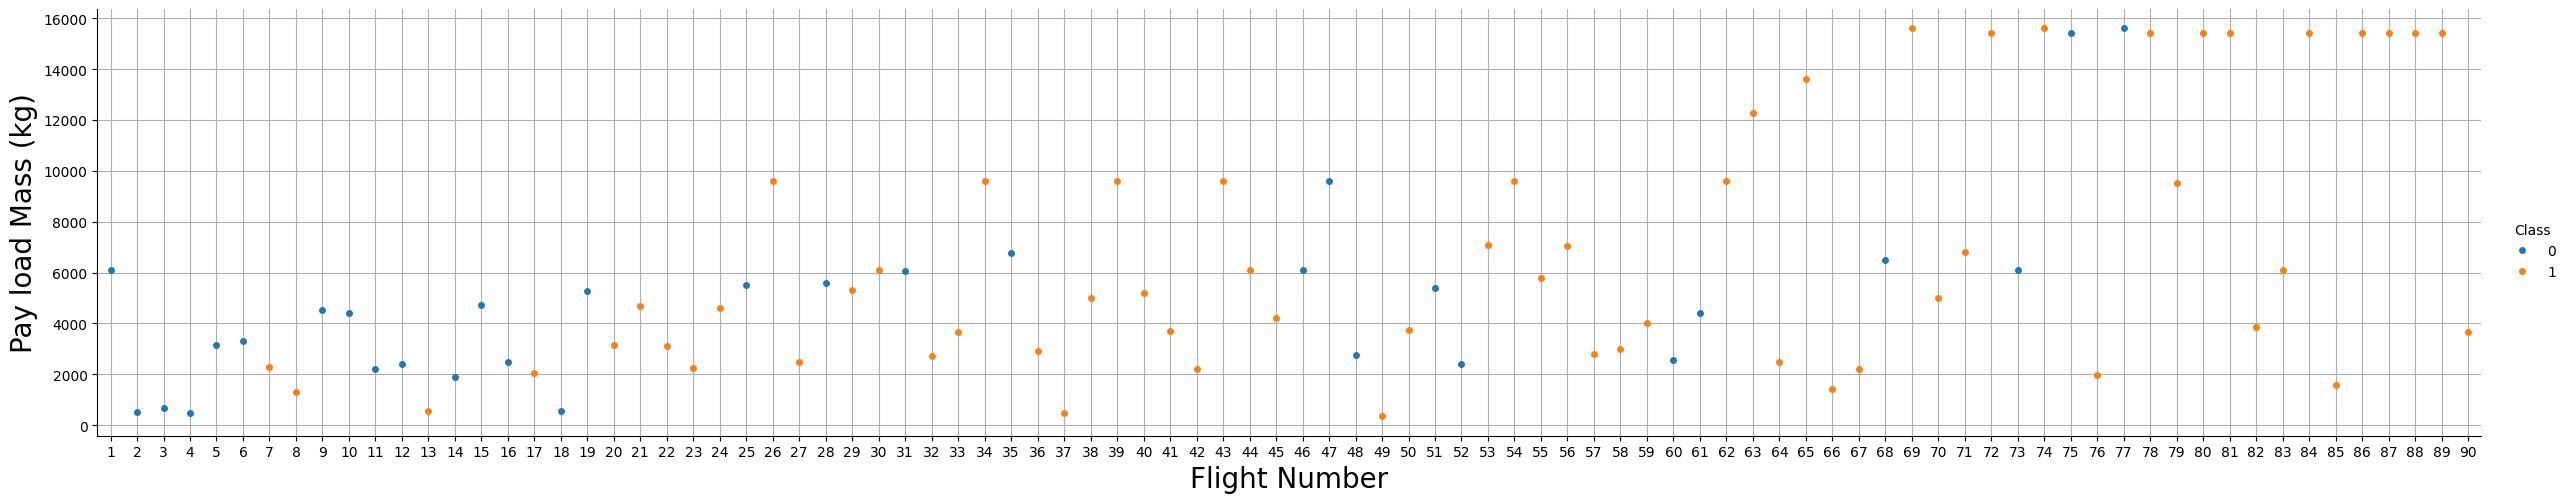

In [24]:
# Grafico de Dispersão com Seaborn
sns.catplot(y='PayloadMass',
            x='FlightNumber',
            hue='Class',
            data=df,
          aspect = 5)# 
# Identifica o Eixo X
plt.xlabel('Flight Number',
           fontsize=20)
# Identificando o Eixo Y
plt.ylabel('Pay load Mass (kg)',
           fontsize=20)
plt.grid()
plt.show()

Aparentemente, a classe 1, referente ao pouso com sucesso do primeiro estagio do Falcon 9, se mostram mais acentuada a medida em que aumenta o numero de lançamentos, o que leva a crer que, o pouso tende a ter maior prababilidade de sucesso quando se aumenta a quantidade de lançamentos, em compraração a classe zero, que identifica o fracasso no pouso.

Entretanto, não se pode extrair com precisão, alguma conclusão mais incisiva quando a relação da massa de carga util e o desfecho no pouso do primeiro estagio do Falcon 9, uma vez que, se encontra muito pulverizada a distribuição das classes. A massa da carga útil também é importante, pois, parece que quanto mais massiva a carga útil, menos provável que o primeiro estágio retorne com sucesso em seu pouso.

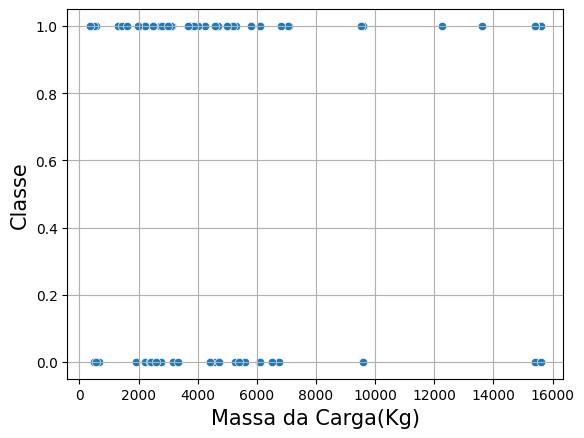

In [25]:
# Plotando um grafico de dispersão com seaborn
sns.scatterplot(
    x='PayloadMass',
    y='Class',
    data=df)
# Nomendo o Eixo Y e dimensionando a fonte
plt.ylabel('Classe', 
           fontsize=15)
# Nomendo o eixo X e dimensionando a fonte
plt.xlabel('Massa da Carga(Kg)', 
           fontsize=15)
# Inserir uma grade para referencial
plt.grid()
# Mostrar o grafico
plt.show()

In [26]:
# Obter o valor da maior carga que obteve exite no pouso
print(df[df['Class'] == 1]['PayloadMass'].max(),'Kg')

15600.0 Kg


In [27]:
# Obter a media da massa da carga util que obteve sucesso no pouso
print(round(df[df['Class'] == 1]['PayloadMass'].mean(),2),'Kg')

6765.16 Kg


In [28]:
# Obter o valor da menor carga que obteve exite no pouso
print(df[df['Class'] == 1]['PayloadMass'].min(),'Kg')

350.0 Kg


In [29]:
# Obtendo a qtd total de pousos bem sucedidos que possuem massa de carga util maior ou igual a 8.000Kg 
print('Quantidade Total = ',((df[df['Class'] == 1]['PayloadMass'] >= 8000) == True).sum())

Quantidade Total =  20


In [30]:
# Obtendo a qtd total de pousos bem sucedidos que possuem massa de carga util menor que 8.000Kg 
print('Quantidade Total = ',((df[df['Class'] == 1]['PayloadMass'] < 8000) == True).sum())

Quantidade Total =  40


In [31]:
# Obtendo o qtd total de pousos bem sucedidos
print('Quantidade Total de Lançamentos Bem Sucedidos = ', (df['Class'] == 1).sum())

Quantidade Total de Lançamentos Bem Sucedidos =  60


In [32]:
# Obtendo o total de lançamentos
print('Quantidade Total de Lançamentos = ', len(df['Class']))

Quantidade Total de Lançamentos =  90


Analisando mais afundo a relação entre os resultados obtidos no pouso do primeiro estagio, sucesso ou fracasso, em relaçao a massa de carga util que ele carrega, pode se perceber ao visualizar o grafico acima que, e os resultados das pesquisas acima, todos os pousos bem sucedidos estão dentro da faixa que vai de, 350Kg até 15600Kg, porém, há uma maior contentração de pousos com sucesso, entre a faixa que se situa, acima de 350Kg e abaixo de 8000kg. 

Em um total de 90 lançamentos, 60 obtiveram sucesso em seus respectivos pousos, enquanto que 30, foram mau sucedidos, o que mostra, um total de 66,7% de acertividade, por outro lado, 33,3 foram mau sucedidos em seus pousos. 

Dos 60 pousos que obtiverem sucesso, 40 estão localizados abaixo de 8000Kg e acima de 350Kg, e os outros 20, estão acima de 8000Kg e abaixo 15600Kg, isso nos diz que, 44% dos pousos bem sucedidos fazem parte da faixa mais baixa, a qual, esta entre 350Kg a 8000Kg, o que corrobora a visão inicial, onde, quanto mais massiva a carga útil, menos provável que o primeiro estágio retorne com sucesso em seu pouso.

### Vizualizando a Relaçao Entre as Variaveis ``FlightNumber`` e  ``LaunchSite`` em Comparação a Variavel ``Class``

Como a geolocalização, do ponto de lançamento, possui total relação com a trajetoria do foguete até o ponto de interesse no espaço, e seu retorno, entender a relação do sucesso ou fracasso do pouso se torna de suma importancia.

Agora, a intenção é visualizar a relação que existe entre a variavel ``FlightNumber`` e a ``LaunchSite``,a qual, identifica a base de lançamento que o foguete Falcon 9 fora lançado.

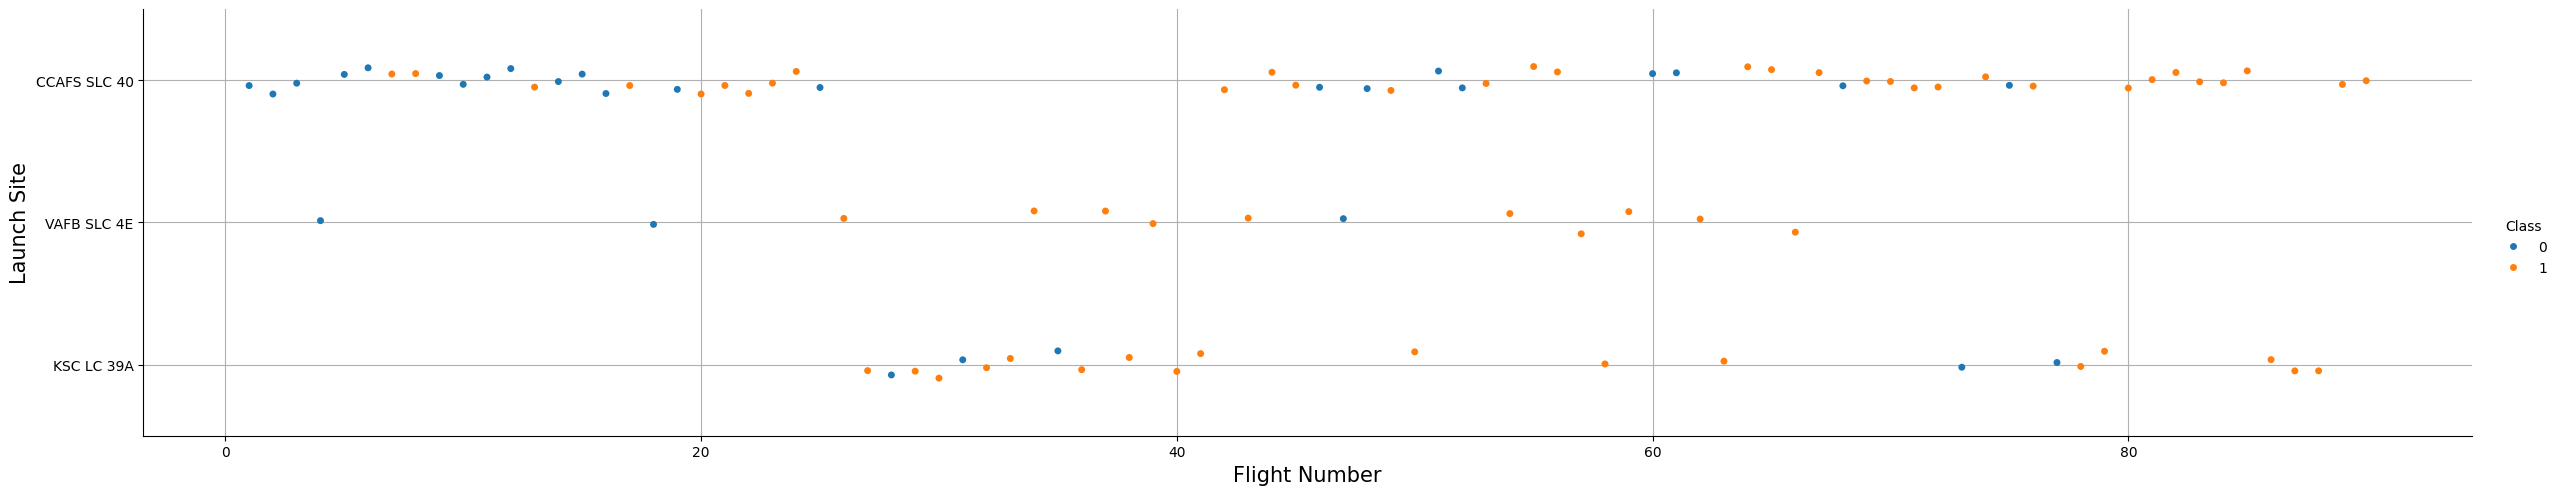

In [33]:
# Plotando um grafico de dispersão com seaborn
sns.catplot(
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',
    data=df,
    aspect=5)
# Nomendo o Eixo X e dimensionando a fonte
plt.xlabel('Flight Number', 
        fontsize=15)
# Nomendo o Eixo Y e dimensionando a fonte
plt.ylabel('Launch Site',
        fontsize=15)
# Inserir uma grade para referencial
plt.grid()
# Mostrar o grafico
plt.show()

In [34]:
# Extraindo a qtd. total de lançamentos em relação a localização da base a qual fora lançado.
print('Identificação das Bases de Lançamento\n\n',
    df['LaunchSite'].value_counts())

Identificação das Bases de Lançamento

 LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [35]:
for i in df['LaunchSite'].unique():
    # Filtrando os dados de interesse e obtendo o percentual
    perc = round(df.loc[df['LaunchSite'] == i]['Class'].value_counts(normalize=True)*100,2)
    # Filtrando os dados de interesse e extraindo a quantidade total
    Qtd = df.loc[df['LaunchSite'] == i]['Class'].value_counts()
    print(
f"""
__________________________________________________________________________________
Qtd Total das Classes em relação ao Lançamentos na Base >>> {i}\n
{Qtd}

Percentual das Classes em relação ao Lançamentos na Base >>> {i}\n
{perc} 
__________________________________________________________________________________
""")


__________________________________________________________________________________
Qtd Total das Classes em relação ao Lançamentos na Base >>> CCAFS SLC 40

Class
1    33
0    22
Name: count, dtype: int64

Percentual das Classes em relação ao Lançamentos na Base >>> CCAFS SLC 40

Class
1    60.0
0    40.0
Name: proportion, dtype: float64 
__________________________________________________________________________________


__________________________________________________________________________________
Qtd Total das Classes em relação ao Lançamentos na Base >>> VAFB SLC 4E

Class
1    10
0     3
Name: count, dtype: int64

Percentual das Classes em relação ao Lançamentos na Base >>> VAFB SLC 4E

Class
1    76.92
0    23.08
Name: proportion, dtype: float64 
__________________________________________________________________________________


__________________________________________________________________________________
Qtd Total das Classes em relação ao Lançamentos na Base >>> KSC 

Em um total de 90 lançamentos existentes no conjunto de dados, 55 deles foram realizados na base **CCAFS SLC 40**, o que representa, por volta de 61,11...% dos lançamentos, e deste total de 55 lançamentos realizados desta base, obtiveram 33 pousos do primeiro estagi da Falcon 9 com sucesso, isso mostra que, dos 61,11% dos lanaçantos realizdos por esta base, 60% obteve sucesso no pouso do primeiro estagio, contra 33% que houve falha no pouso.

Já na base **KSC LC 39A** foram 22 lançamentos no total, o que equivale a 24,44...% dos lançamentos feitos desta base, e deste total, 17 foram de pousos bem sucedidos e 5 que fracassaram no pouso, isso nos que, 77,27% do total de 24,44...% foram acertivos ao pousar, enquanto que, 22,73% foram negativos em seus respctivos pousos de retorno, e o mesmo cenario quanse que se aproxima em alguns aspectos, quanto se olha para os numeros obtidos na base **VAFB SLC 4E**, ambas obtiveram resultados proximos, quanto ao sucesso no pouso do primeiro estagio do Falcon 9.

Na base **VAFB SLC 4E**, foram 13 lançamentos no total, o que da, 14,44...% dos lançamentos por meio desta base, e destes, 10 obtiveram sucesso em seus pousos, e com 3 houve algum problema ao pousar, podemos concluir com isso que, do total de 14,44...% dos lançamentos, 76,92 obteve sucesso no pouso do primeiro estagio do Falcon 9, contra 23,08% que fracassaram ao pousar.

###  Visualizar a Relação Entre as Variaveis  ``PayloadMass`` e ``LaunchSite`` em comparação a Variavel ``Class``

Como analisado anteriormente, a variavel referente a massa de carga util que o Falcon 9 carrega, se mostrou relevate ao desfecho do pouso do primeiro estagio, isso faz com que seja necessario comparar essa variavel a outras que estão presentes no conjunto de dados, em relação a variavel dependete **Class**, para que se analise melhor, de que maneira o peso e o local de lançamento, influenciam no resultado final do pouso.

Direcionado a esse olhar, será plotado um grafico de dispersão, para analisar a relaçao entre as variaveis, massa de carga util e base de lançamento, ambas em comparação a variavel **Class**. 

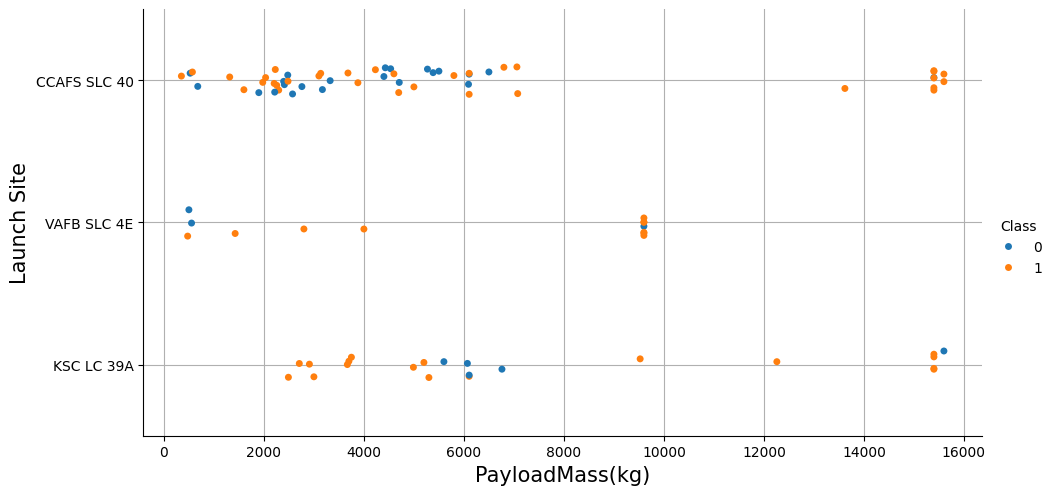

In [36]:
# plotando um Grafico de Dispersão com seaborn
sns.catplot(
x='PayloadMass',
y='LaunchSite',
data=df,
hue='Class',
aspect=2)
# Nomendo o Eixo X e dimensionando a fonte
plt.xlabel('PayloadMass(kg)', 
        fontsize=15)
# Nomendo o Eixo Y e dimensionando a fonte
plt.ylabel('Launch Site',
        fontsize=15)
# Inserir uma grade para referencial
plt.grid()
# Mostrar o grafico
plt.show()

Por meia da analise grafica, conclui se que, na base de lançamentos **VAFB SLC 4E**, quando a massa de carga util se encontra inserida dentro do intervalo de aproximadamente de 350Kg até 10.000kg, a grande maioria dos pousos obtiveram sucesso no retorno do primeiro estagio do Falcon 9.

Também pode se inferir, analisando graficamente que, a base **KSC LC 39A** quando realiza lançamentos com massa de carga util, abaixo de aproximadamente 5.500Kg e acima de 2.000Kg, praticamente, todos os pousos de retono do primeiro estagio, obtiveram exito em seus repectivos pousos de retorno. Há de se destacar nesta mesma base que, quando a massa de carga util esta situada no intervalo que fica acima de 8.000kg e vai ate um pouco abaixo de 16.000Kg, todos os resultados do pouso foram de sucesso, na verdade, pode se afirmar que, as bases **VAFB SLC 4E** e **KSC LC 39A** foram as quais obtivaram mais sucesso nos pousos de retorno.

já a base **CCAFS SLC 40**, nitidamente se nota o maior numero de lançamentos realizados por ela em conparação as demais, é possuivel se extrair que, com mass de carga util abaixo de 8.000Kg, existe quase que um equilibrio na distribuição entre os resultados dos pousos positivo e negativo, entretanto, acima desta massa quase todos os pousos tiveram sucesso no pouso do primeiro estagio do Falcon 9.

É totalmente possivel retirar infomações em uma analise grafica, porém, para a coleta de mais evidencias que confirmem as analises que foram feitas, se mostra essencial filtrar os valores para uma conclusão mais acertiva. 

In [37]:
# Filtrando dados de interesse referente a bases
for i in df['LaunchSite'].unique():
    df_localPeso = df.loc[df['Class'] == 1]
    df_localPeso = df_localPeso.loc[:,['LaunchSite', 
                    'PayloadMass', 
                    'Class']]
    df_slc40 = df_localPeso[
    df_localPeso['LaunchSite'] == i]
    slc40_max = df_slc40['PayloadMass'].max()
    slc40_mean = df_slc40['PayloadMass'].mean()
    slc40_min = df_slc40['PayloadMass'].min()
    print(f'Base de Lançamento: {i}\nMassa de Carga Util Maximo que Obteve Sucesso: {slc40_max} Kg')
    print(f'Média de Massa de Carga Util que obteve Sucesso: {round(slc40_mean,2)}')
    print(f'Massa de Carga Util Minimo que Obteve Sucesso: {slc40_min} Kg\n\n')
    # segregando somente os dados dos quais façam parte do conjunto a qual possui classe positiva na variavel "Class"
    # Extraindo após a filtragem, os pesos maximos e minimos de pesos que obtiveram sucesso no pouso, 
    # de acordo com o local de lançamento

Base de Lançamento: CCAFS SLC 40
Massa de Carga Util Maximo que Obteve Sucesso: 15600.0 Kg
Média de Massa de Carga Util que obteve Sucesso: 6436.47
Massa de Carga Util Minimo que Obteve Sucesso: 350.0 Kg


Base de Lançamento: VAFB SLC 4E
Massa de Carga Util Maximo que Obteve Sucesso: 9600.0 Kg
Média de Massa de Carga Util que obteve Sucesso: 6630.0
Massa de Carga Util Minimo que Obteve Sucesso: 475.0 Kg


Base de Lançamento: KSC LC 39A
Massa de Carga Util Maximo que Obteve Sucesso: 15400.0 Kg
Média de Massa de Carga Util que obteve Sucesso: 7482.7
Massa de Carga Util Minimo que Obteve Sucesso: 2490.0 Kg




Na base de lançamento **CCAFS SLC 40**, o maior valor de massa de carga util, a qual obtive sucesso no pouso, foi de 15600Kg e o valor minimo de carga foi de 350Kg, com uma aproximação de 2,24% entre o minimo e o maximo, ja na base **VAFB SLC 4E**, a mais alta massa de carga util que obteve exito, foi de 9600Kg, contra um valor minimo de 475Kg, o que mostra um aproximação entre eles de aproximadamente 4,94%, e por fim, a base **KSC LC 39A**, com um valor maximo de massa de carga util, obtendo sucesso no pouso do primeiro estagio, com 15400Kg e um minimo de 2490Kg, informando um aproximação entre o valor maximo e o minimo, por volta de 16,17%. 

Contudo, pode se extrair ao observando os percentuais extraidos que, a distribuição dos valores referente as massas de caraga util, a qual, foram lançadas pela base **KSC LC 39A**, possui uma distribuição mais coesa, ao comparar com os demais valores obtidos nas outras bases, mostra uma amplitude menor em relaçao as outras bases, pesar de necessitar de uma anasile mais aprofundada, pode se projetar que, com essa base de lançamento, os dados da variavel ``PayloadMass`` relacionados a esta base estão mais concistentes neste sentido. Sugerir um teste para se exite uma distribuição normal dos dados.

### Visualizar a Relação entre as Variaveis ``FlightNumber`` e ``Orbit`` em comparação a ``Class``

Outra elemento muito relavante que compoe a amostra analisada, é a variavel que informa a órbita em que o foguete falcon 9 foi lançado, pois, como a orbita esta relacionada a trajetoria, ao periodo de tempo que leva para percorrer a trajetoria e também influencia na reentrada, é de total importancia entender a relação que existe entre a órbita é o sucesso ou fracesso do pouso do primeiro estagio do falcon 9.

Órbiat é a trajetória gravitacionalmente curva, e normalmente regular, de um objeto ou astro em torno de um planeta ou estrela. Órbita é o movimento que um corpo celeste, faz ao redor de outro corpo celeste, pela influência de sua gravidade. A órbita terrestre é o movimento que os satélites, sejam eles naturais, ou artificiais, realizam em volta da Terra. 

Órbita espacial é a trajetória curva, que um objeto ou astro descreve em torno de um planeta ou estrela, devido à influência da gravidade. O tipo de órbita é definido pela relação entre o empuxo, a força gravitacional e a força centrífuga, podendo ser circular, parábola ou hipérbole. 

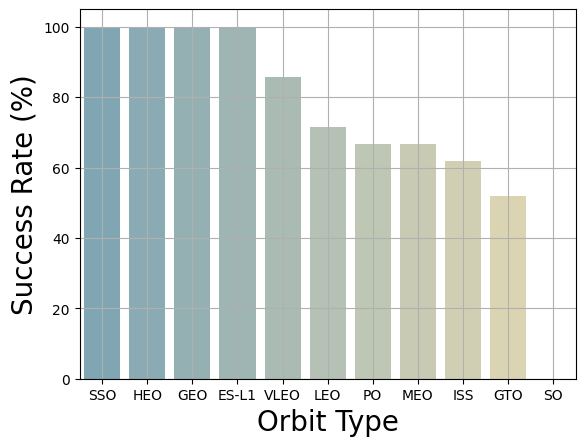

In [38]:
# Utilizando o método groupby na coluna Orbit e obtenha a média da coluna Class
orbit_sucess = round((
    df.groupby(['Orbit'])['Class'].aggregate(
        np.average)*100).reset_index(
            ).sort_values(
                ['Class','Orbit'], 
                ascending=False),2)
# Plotando um Grafico de barras 
# Diemnsionar a taxa percentual da media de pousos bem sucedidos por orbita de lançamento.
sns.barplot(
    x='Orbit',
    y='Class',
    data=orbit_sucess,
    palette="blend:#7AB,#EDA")
plt.ylabel("Success Rate (%)",
        fontsize=20)
plt.xlabel("Orbit Type",
        fontsize=20)
plt.grid()
plt.show()

Analisando visualmente o grafico acima, afirmamos que as orbitas **SSO**, **HEO**, **GEO** e **ES-L1** são as que obtiveram uma taxa média de sucesso de 100% no pouso do primeiro estagio do falcon 9, já por outrom lado, excluindo a orbita **SO**, as demais, estão dentro de um intervalo de taxa média de sucesso de aproximadadente, entre 55% á 85%. Conclui se com essa analise, que, obviamente, as orbitas mais indicadas para os lançamentos, são as com 100% de sucesso.

Agora será incluída mais uma variavel, além de **Class** e **Orbit**,  **FlightNumber** também se unirá as demais já existentes, o intuito, é visualizar a relação que existe entre a taxa de sucesso no pouso, em compração as variaveis referente a orbita de lançamento e o numero de lançamentos.

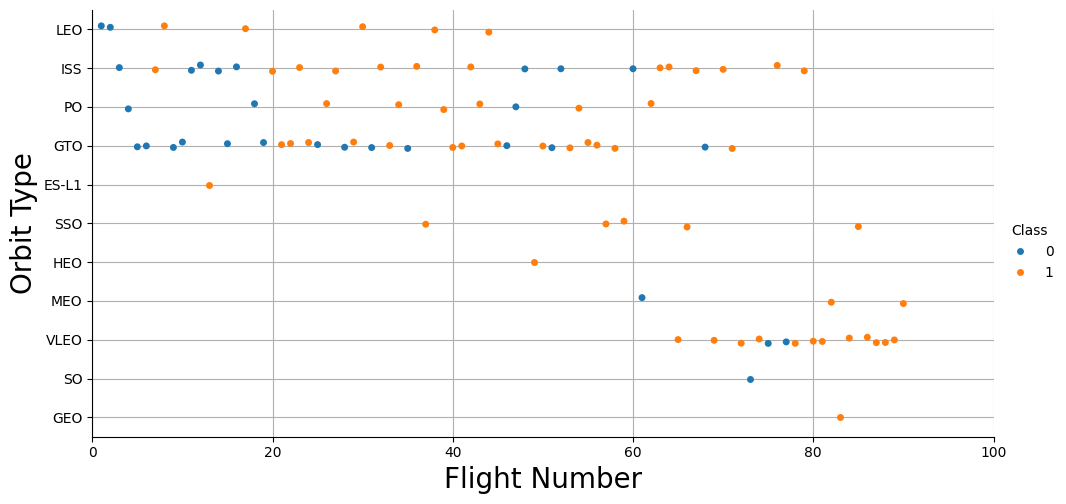

In [39]:
# Plotando gráfico de dispersão com "FlightNumber" Vs. "Orbit", em relação a "Class"
sns.catplot(
x='FlightNumber',
y='Orbit',
data=df,
hue='Class',
aspect=2)
plt.ylabel("Orbit Type",
        fontsize=20)
plt.xlabel("Flight Number",
        fontsize=20)
plt.xlim(0,100)
plt.grid()
plt.show()

As orbita **GEO**, **HEO** e **ES-L1**  possuem 100% de sucesso em seus repectivos pousos de retorno, entrentanto, isso se deve ao fato de haver apenas um lançamento em todas as orbitas, e estas com sucesso nos pousos, pelo motivo de haver pouquissímos lançamentos nestas orbitas, não se pode afirmar com toda certeza, se estas orbitas são realmente eficientes para um resultado de pouso bem sucedido, porém, no futuro, coletando mais dados de lançamentos e dos rersultados obtidos com os pousos, poderemos afirmar ou refutar com certeza, a real qualidade das orbitas.

Na orbita **ISS** e na **PO**, pode se observar que, em um intervalo que vai do 20º lançamento ate proximo do 45º, todos os pousos de retorno foram bem sucedidos, isso mostra que durante aproximadamente 25 lançamentos dentro destas orbitas, todos os pousos de retorno do primeiro estagio do Falcon 9 obtiveram sucesso. 

Deve se também ressaltar que, na orbita **ISS**, acima do 60º lançamento, todos os pousos do primeiro estagio foram bem sucedidos, e o mesmo cenario se repete na orbit **VLEO**, porém, os pousos do primeiro estagio começaram a ser todos com sucesso apartir do 80º lançamento em diante.

### Visualizar Relação entre a variavel ``PayloadMass`` e ``Orbit`` em comparação a variavel ``class``

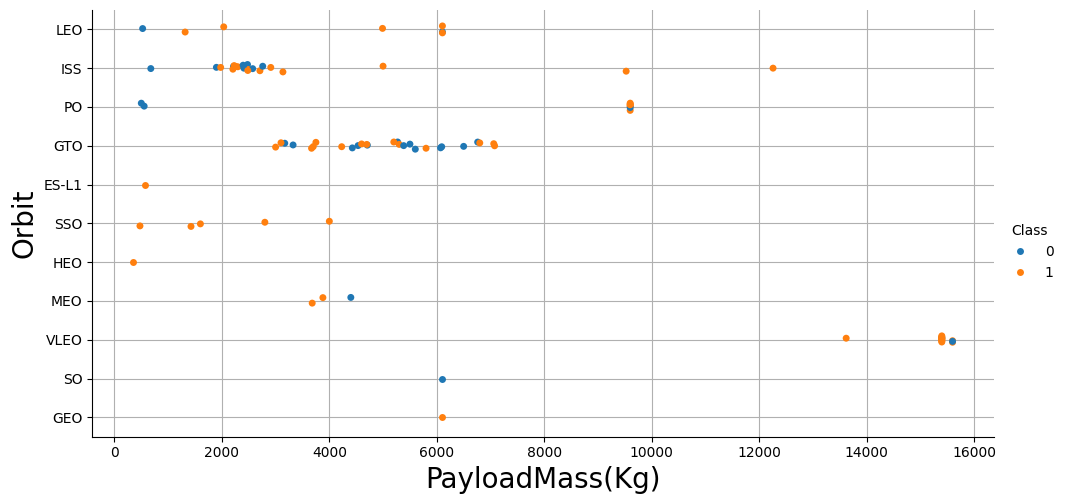

In [60]:
sns.catplot(
    data=df,
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    aspect=2)
plt.xlabel('PayloadMass(Kg)',
    fontsize=20)
plt.ylabel('Orbit',
    fontsize=20)
plt.grid()
plt.show()

Dentre as orbitas relacionadas, pode se inferir que a orbita **SSO** aparenta ser a mais signifcativa no que tange o sucesso do pouso do primeiro estagio do falcon 9, quanto há uma massa de carga útil presente, pois, todos os pousos obtiveram exito em seus repectivos pousos de retorno.

A orbita **ISS**, também se torna muito relevante quanto a massa de carga util esta acima de 3000kg, porque, todos os pousos de retorno do falcon 9 foram bem sucedidos a partir desta faixa de massa de carga util, em diante.



In [41]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')